# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Read csv files as dataframe

In [2]:
df_npk = pd.read_csv('../Data_collection/Hair_cosmetics_by_PEH_napieknewlosy.csv')
df_l = pd.read_csv('../Data_collection/Hair_cosmetics_by_PEH_loczek.csv')

In [3]:
#For editing purpose you can uncomment below lines to show full dataframes
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)

In [4]:
df_npk

,Unnamed: 0,inci,title,peh_class
0,0,"Aqua [Water],Cetyl alcohol,Behenamidopropyl d...",ALKEMILLA Balsamo Arancio e Limone Odżywka do ...,E
1,1,"Aqua [Water],Cetyl alcohol,Behenamidopropyl d...",ALKEMILLA Balsamo Cedro e Finocchio Odżywka do...,E
2,2,"Aqua [Water], Cetyl alcohol, Behenamidopropyl...",ALKEMILLA Balsamo Lavendo e Eucalipto Odżywka ...,E
3,3,"Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...",ALKEMILLA K-HAIR Anti-Giallo Odżywka ochładzaj...,E
4,4,"Aqua [Water] (Eau), Stearyl alcohol, Behenami...",ALKEMILLA K-HAIR Multiwitaminowa maska do włos...,E
...,...,...,...,...
275,52,"Aqua, Cetearyl Alcohol, Glycerin, Behenamidop...",VIS PLANTIS Odżywka do włosów osłabionych z te...,H
276,53,"Aqua, Cetearyl Alcohol, Glycerin, Behenamidop...",VIS PLANTIS Odżywka do włosów osłabionych zabi...,H
277,54,"Aqua, Cetearyl Alcohol, Glycerin, Behenamidop...",VIS PLANTIS Odżywka do włosów suchych i matowy...,H
278,55,"Aqua, Cetearyl Alcohol, Behenamidopropyl Dime...",VIS PLANTIS Odżywka do włosów z tendencją do p...,H


In [5]:
df_l

,Unnamed: 0,inci,title,peh_class
0,0,"Water (Aqua/Eau),Carbomer,Polysorbate-20,VP/VA...",CANTU MOISTURE RETENTION STYLING GEL- żel utrz...,E
1,1,"Water (Aqua),Eau),Glycerin,Fragrance (Parfum),...",CANTU SHEA BUTTER COCONUT OIL SHINE & HOLD MIS...,E
2,2,"Water (Aqua/Eau),Polyquaternium-37,Cyclopentas...",Tigi Catwalk Curls Rock Amplifier – krem styli...,E
3,3,"Aqua (Water),Cetearyl Alcohol,Cetrimonium Chlo...",INSIGHT ENERGIZING MASK – emolientowa maska do...,E
4,4,"Aqua,Cetearyl Alcohol,Myristyl Alcohol,Cetrimo...",DR. SANTE COCONUT HAIR Z OLEJEM KOKOSOWYM – ma...,E
...,...,...,...,...
298,122,"Aloe Barbadensis (Aloe Vera) Leaf Juice,Nelumb...","Holika Holika – wielofunkcyjny, nawilżający że...",H
299,123,"Aqua,Sodium Hyaluronate,Benzyl Alcohol,Dehydro...","Calaya – nawilżający żel hialuronowy, 2% (50 ml)",H
300,124,"Aqua,Sapindus Mukurossi Peel Floral Water,Humu...",FITOKOSMETIK DROŻDŻE PIWNE AKTYWATOR WZROSTU –...,H
301,125,"Linum Usitatissimum (Linseed) Seed Extract,Gly...",JESSICURL Rockin’ Ringlets Styling Potion No F...,H


## Concatenate 2 dataframes into 1

In [6]:
df_peh = pd.concat([df_npk, df_l], ignore_index=True)

In [7]:
df_peh.shape

(583, 4)

## Exploring dataset

In [8]:
df_peh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  583 non-null    int64 
 1   inci        578 non-null    object
 2   title       583 non-null    object
 3   peh_class   583 non-null    object
dtypes: int64(1), object(3)
memory usage: 18.3+ KB


In [9]:
df_peh.dtypes

Unnamed: 0     int64
inci          object
title         object
peh_class     object
dtype: object

In [10]:
df_peh.columns

Index(['Unnamed: 0', 'inci', 'title', 'peh_class'], dtype='object')

In [11]:
df_peh.drop(['Unnamed: 0'], axis=1, inplace=True)

## Check how ingredients description looks initially

In [12]:
df_peh['inci']

0       Aqua [Water],Cetyl alcohol,Behenamidopropyl d...
1       Aqua [Water],Cetyl alcohol,Behenamidopropyl d...
2       Aqua [Water], Cetyl alcohol, Behenamidopropyl...
3       Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...
4       Aqua [Water] (Eau), Stearyl alcohol, Behenami...
                             ...                        
578    Aloe Barbadensis (Aloe Vera) Leaf Juice,Nelumb...
579    Aqua,Sodium Hyaluronate,Benzyl Alcohol,Dehydro...
580    Aqua,Sapindus Mukurossi Peel Floral Water,Humu...
581    Linum Usitatissimum (Linseed) Seed Extract,Gly...
582    Aqua (Water),Linum Usitatissimum (Linseed) See...
Name: inci, Length: 583, dtype: object

# Data cleaning

## Find nan values

In [13]:
rows_with_nan = [index for index, row in df_peh.iterrows() if row.isnull().any()]
rows_with_nan

[27, 123, 124, 145, 146]

In [14]:
for i in rows_with_nan:
    print(df_peh['title'][i])   

BIOLAVEN x NAPIEKNEWLOSY.PL Zestaw szampon + odżywka z olejem z pestek winogron 2x300ml
ANWEN Wegański zestaw odżywek do włosów o średniej porowatości 3x100ml
ANWEN Zestaw odżywek do włosów o średniej porowatości 3x100ml
CAFE MIMI Maska z keratyną – do włosów farbowanych i zniszczonych 110ml
CAFE MIMI Maska z proteinami – do włosów cienkich i łamliwych 110ml


## Fill or drop nan values
Because there are only few missing ingredient list - I've decided to add 2 of them manually and remove the rest.

In [15]:
df_peh['inci'][145] = 'Aqua, Plumeria Alba (Frangipani) Flower Water, Cetearyl Alcohol, Vegetable Glyсerin, Ginkgo Biloba Leaf Extract, Zingiber Officinale (Ginger) Root Extract, Butyrospermum Parkii (Shea) Oil, Caprylic/Capric Triglyceride, Hydrolyzed Keratin, Persea Gratissima (Avocado) Oil, Behentrimonium Chloride, Hydroxypropyl Guar, Hydroxypropyltrimonium chloride, Hydroxyethylcellulose, Panthenol, Perfume, Silicone Quaternium-18, Trideceth-6, Trideceth-12, Polyquaternium-10, Benzyl Alcohol, Benzoic Acid , Dehydroacetic Acid, Potassium Sorbate, Sodium Benzoate, Citric Acid,  Butylphenyl Methypropional, Linalool, Limonene, Citronellol, Coumarin, Geraniol, Citral'
# df_peh['inci'][145]

In [16]:
df_peh['inci'][146] = 'Aqua, Malva Sylvestris (Mallow) Flower Water, Cetearyl Alcohol, Vegetable Glyсerin, Linum Usitatissimum (Flax) Seed  Extract, Bambusa Vulgaris (Bamboo) Extract, Caprylic/Capric Triglyceride, Cocos Nucifera (Coconut) Oil, Hydrolyzed Wheat Proteins , Hydrolyzed Rye, Hydrolyzed Oat Proteins, Behentrimonium Chloride,  Hydroxyethylcellulose,   Panthenol, Hydroxypropyl Guar,  Hydroxypropyltrimonium chloride, Silicone Quaternium-18, Trideceth-6, Trideceth-12, Polyquaternium-10, Perfume, Benzyl Alcohol, Benzoic Acid , Dehydroacetic Acid, Potassium Sorbate, Sodium Benzoate, Citric Acid, Hexyl Cinnamal, Benzyl Salicylate, Limonene, Linalool, Citronellol, Coumarin'
# df_peh.loc[146]

In [17]:
df_peh.drop([27], inplace=True)
df_peh.drop([123], inplace=True)
df_peh.drop([124], inplace=True)
df_peh.reset_index(drop=True, inplace=True)
# df_peh

In [18]:
df_peh.isnull().sum()

inci         0
title        0
peh_class    0
dtype: int64

## Ingredient list editing

In [19]:
# Creating copy of the dataframe for editing so that original data remains intact
df_peh_work = df_peh.copy()

In [20]:
df_peh_work

,inci,title,peh_class
0,"Aqua [Water],Cetyl alcohol,Behenamidopropyl d...",ALKEMILLA Balsamo Arancio e Limone Odżywka do ...,E
1,"Aqua [Water],Cetyl alcohol,Behenamidopropyl d...",ALKEMILLA Balsamo Cedro e Finocchio Odżywka do...,E
2,"Aqua [Water], Cetyl alcohol, Behenamidopropyl...",ALKEMILLA Balsamo Lavendo e Eucalipto Odżywka ...,E
3,"Aqua [Water] (Eau), Cetyl alcohol, Stearyl al...",ALKEMILLA K-HAIR Anti-Giallo Odżywka ochładzaj...,E
4,"Aqua [Water] (Eau), Stearyl alcohol, Behenami...",ALKEMILLA K-HAIR Multiwitaminowa maska do włos...,E
...,...,...,...
575,"Aloe Barbadensis (Aloe Vera) Leaf Juice,Nelumb...","Holika Holika – wielofunkcyjny, nawilżający że...",H
576,"Aqua,Sodium Hyaluronate,Benzyl Alcohol,Dehydro...","Calaya – nawilżający żel hialuronowy, 2% (50 ml)",H
577,"Aqua,Sapindus Mukurossi Peel Floral Water,Humu...",FITOKOSMETIK DROŻDŻE PIWNE AKTYWATOR WZROSTU –...,H
578,"Linum Usitatissimum (Linseed) Seed Extract,Gly...",JESSICURL Rockin’ Ringlets Styling Potion No F...,H


In [21]:
# This function unifies ingredient lists and split them into array of idividual ingredients
def clean_and_split_data(inci_data):
    cleanedData = inci_data.replace("'", '')
    cleanedData = cleanedData.replace("\\xa0", '').replace("\xa0", '').lower()
    cleanedData = cleanedData.replace("\xad", '')
    cleanedData = cleanedData.replace("with infusion of", ',')
    cleanedData = cleanedData.replace("with infusions of", ',')
    cleanedData = cleanedData.replace(':','').replace("\n", '').replace('.','')
    cleanedData = cleanedData.replace('*','').replace("()", '')
    cleanedData = cleanedData.replace(',,', ',').split(',')
    return cleanedData


In [22]:
#Create new empty column for unified ingredient lists and type it as object
df_peh_work['inci_as_array'] = np.nan
df_peh_work['inci_as_array'] = df_peh_work['inci_as_array'].astype(object)

for row_ind in range(0, len(df_peh_work['inci'])):
    # each ingredient list need to be converted to string, to enable further editing in clean_and_split_data function
    inci_str = str(df_peh_work.loc[row_ind]['inci'])
    inci_list = clean_and_split_data(inci_str)
    df_peh_work.at[row_ind, 'inci_as_array'] = inci_list
    
print(df_peh_work.loc[0])

inci              Aqua [Water],Cetyl alcohol,Behenamidopropyl d...
title            ALKEMILLA Balsamo Arancio e Limone Odżywka do ...
peh_class                                                        E
inci_as_array    [aqua [water], cetyl alcohol, behenamidopropyl...
Name: 0, dtype: object


### Unifying ingredients names

In [23]:
# Ingredient list example before the unifying
df_peh_work['inci_as_array'][0]

['aqua [water]',
 'cetyl alcohol',
 'behenamidopropyl dimethylamine',
 'butyrospermum parkii (shea butter) butter',
 'sesamum indicum (sesame) seed oil ',
 'citrus aurantium dulcis (orange) peel oil ',
 'citrus limon (lemon) peel oil ',
 'citrus aurantium dulcis (orange) flower extract ',
 'calendula officinalis flower extract ',
 'chamomilla recutita (matricaria) flower extract ',
 'citrus limon (lemon) peel extract ',
 'soy amino acids',
 'wheat amino acids',
 'arginine hcl',
 'serine',
 'threonine',
 'lactic acid',
 'sorbitol',
 'benzyl alcohol',
 'limonene',
 'sodium benzoate',
 'sodium dehydroacetate',
 'glycerin',
 'xanthan gum z kontrolowanych upraw ekologicznych']

In [24]:
for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work['inci_as_array'][product]
    for i in range(0, len(inci_splitted)):
        current_ingredient = inci_splitted[i]
#         if 'aqua' in current_ingredient or 'aqua' in current_ingredient or 'water' in current_ingredient or 'Water' in current_ingredient or 'woda' in current_ingredient:
        if 'aqua' and 'water' in current_ingredient:
            inci_splitted[i] = 'aqua'
        elif 'xanthan' in current_ingredient:
            inci_splitted[i] = 'xanthan gum'
        elif 'parfum' in current_ingredient:
            inci_splitted[i] = 'parfum'
        elif "(" in current_ingredient:
            while "(" in current_ingredient and ")" in current_ingredient:
                opening_par_index = current_ingredient.find("(")
                closing_par_index = current_ingredient.find(")", opening_par_index)
                current_ingredient = current_ingredient[:opening_par_index] + current_ingredient[closing_par_index + 1:]
            
            inci_splitted[i] = current_ingredient

        current_ingredient = None

In [25]:
for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work['inci_as_array'][product]
    for index, current_ingredient in enumerate(inci_splitted):
        if "ż" in current_ingredient or 'ć' in current_ingredient or 'ł' in current_ingredient or 'ą' in current_ingredient or 'ę' in current_ingredient:
            inci_splitted.remove(current_ingredient)
            
            
#     print(inci_splitted) 

In [26]:
# Looking for lists with unwanted signs and text
for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work['inci_as_array'][product]
    for i in range(0, len(inci_splitted)):
        current_ingredient = inci_splitted[i]
        if '♥' in current_ingredient:
            inci_splitted[i] = 'butyrospermum parkii butter' # replacing this sign doesnt work so I have to replace the whole string 
            print(inci_splitted[i])
        elif 'scent and love' in current_ingredient:
            df_peh_work['inci_as_array'][product].pop(-1) #this text is always on the last position

butyrospermum parkii butter
butyrospermum parkii butter
butyrospermum parkii butter
butyrospermum parkii butter


In [27]:
# Removing irrelevant suffixes
for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work['inci_as_array'][product]
    for i in range(0, len(inci_splitted)):
        current_ingredient = inci_splitted[i]
        if "z kontrol" in current_ingredient:
            end_synt_index = current_ingredient.find("z kontrol")
            current_ingredient = current_ingredient[:end_synt_index]
            
        elif "z ekolo" in current_ingredient:
            end_synt_index = current_ingredient.find("z ekolo")
            current_ingredient = current_ingredient[:end_synt_index]
            
        elif "z rolni" in current_ingredient:
            end_synt_index = current_ingredient.find("z rolni")
            current_ingredient = current_ingredient[:end_synt_index]
        inci_splitted[i] = current_ingredient

In [28]:
# Remove white spaces
for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work['inci_as_array'][product]
    for i in range(0, len(inci_splitted)):
        inci_splitted[i] = inci_splitted[i].strip()

In [29]:
# Example ingredient list after cleaning
df_peh_work['inci_as_array'][0]

['aqua',
 'cetyl alcohol',
 'behenamidopropyl dimethylamine',
 'butyrospermum parkii  butter',
 'sesamum indicum  seed oil',
 'citrus aurantium dulcis  peel oil',
 'citrus limon  peel oil',
 'citrus aurantium dulcis  flower extract',
 'calendula officinalis flower extract',
 'chamomilla recutita  flower extract',
 'citrus limon  peel extract',
 'soy amino acids',
 'wheat amino acids',
 'arginine hcl',
 'serine',
 'threonine',
 'lactic acid',
 'sorbitol',
 'benzyl alcohol',
 'limonene',
 'sodium benzoate',
 'sodium dehydroacetate',
 'glycerin',
 'xanthan gum']

## Extract all ingredients

In [30]:
all_ingredients = []
for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work['inci_as_array'][product]
    for i in range(0, len(inci_splitted)):
        all_ingredients.append(inci_splitted[i])
    
print(len(all_ingredients))

9152


## Extract unique ingredients

In [31]:
def unique(list1): 
    list_set = set(list1)  
    unique_list = (list(list_set)) 
    return unique_list
        
all_unique = unique(all_ingredients)
len(all_unique)

1626

# Create additional  features

In [32]:
SLS_silicone = ['cetyl dimethicone', 'stearoxy dimethicone','stearyl dimethicone', 'stearyl methicone', 'dimethicone','trimethylsilylamodimethicone', 'trimethylsiloxysilicate', 'trisiloxane']
no_SLS_silicone = ['dimethiconol','beheonoxy dimethicone','phenyl trimethicone','lauryl methicone copolyol']
conditioner_silicone = ['cyclo-x-siloxane','amodimethicone', 'dimethicone copolyol'] 
water_silicone = ['peg dimethicone', 'ppg-20 dimethicone','peg-15 Dimethicone','peg-12 dimethicone','peg-7 amodimethicone','pg-propyl silanetriol','dimethicone copolymer','lauryl methicone copolyol','hydroxypropyl polysiloxane','silicone quaternium-8']
evaporate_silicone = ['decamethylcyclotetrasiloxane','hexamethylcyclotrisiloxane','hexamethyldisiloxane','octamethylcyclotetrasiloxane','cyclopentasiloxane']

In [33]:
silicones = SLS_silicone + no_SLS_silicone + conditioner_silicone + water_silicone + evaporate_silicone

In [34]:
harmful_preservative = ['disodium edta', 'methylisothiazolinone', 'triclosan', 'iodopropynyl butylcarbamate', 'imidazolidinyl urea', 'cetrimoniumbromide', 'diazolidinyl urea', 'cetylpyridinium chloride', 'phenoxyethanol', 'tetrasodium edta', 'chlorhexidine']

In [35]:
df_peh_work['Harm_preservatives'] = np.nan
df_peh_work['Harm_preservatives'] = df_peh_work['Harm_preservatives'].astype(object)
df_peh_work['CG'] = np.nan
df_peh_work['CG'] = df_peh_work['CG'].astype(object)

for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work['inci_as_array'][product]
    has_silicone = 0
    has_harmful = 0
    for i in range(0, len(inci_splitted)):
        if any(sil in inci_splitted[i] for sil in silicones):
            has_silicone += 1
        if any(harm in inci_splitted[i] for harm in harmful_preservative):
            has_harmful += 1
        
    df_peh_work.loc[product, 'CG'] = has_silicone
    df_peh_work.loc[product, 'Harm_preservatives'] = has_harmful

# Encode categorical variables

In [36]:
for unique in all_unique:
    df_peh_work[unique] = 0

In [37]:
for product in range(0, len(df_peh_work['inci_as_array'])):
    inci_splitted = df_peh_work.loc[product, 'inci_as_array']
    for i in range(0, len(inci_splitted)):
        ingredient = inci_splitted[i]
        df_peh_work.loc[product, ingredient] = 1
            

To handle multiclassification problem we had to extract unique ingredients and for every product verify it's occurrence. As a result of this operation we've got dataset with high dimensionality. Let's explote it further.

# Exploratory data analysis

Products were sorted by PEH class.

In [38]:
peh_filter = df_peh_work['peh_class'].value_counts()
peh_filter_sorted = peh_filter.sort_values(ascending=True)
peh_filter_sorted

P    124
H    184
E    272
Name: peh_class, dtype: int64

In [39]:
def make_bar_plot(x_values, y_values, data, title, xlabel, ylabel, xticks):
    plt.figure(figsize=(15,8))
    ax = sns.barplot(x=x_values, y=y_values, data=data)
    ax.set_title(title, fontsize=15)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.set_xticklabels(xticks)
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

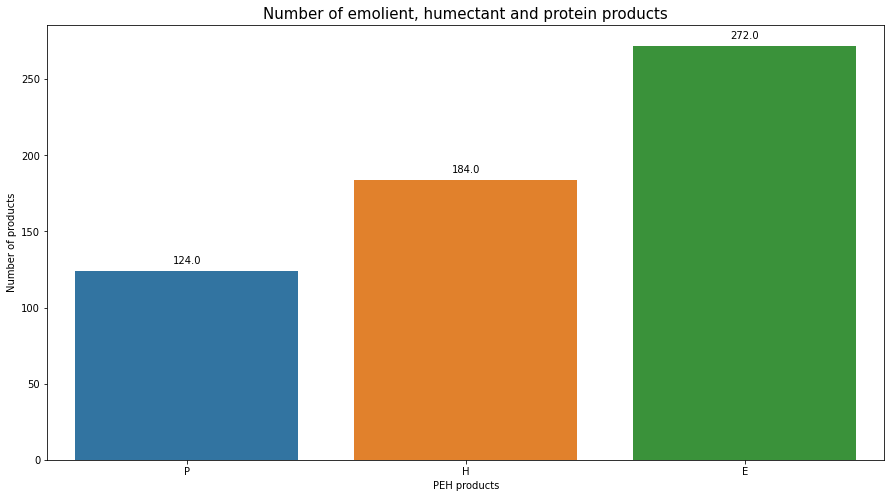

In [40]:
make_bar_plot(peh_filter, peh_filter.values, peh_filter, 'Number of emolient, humectant and protein products','PEH products','Number of products',peh_filter_sorted.index)

In [42]:
cg_filter = df_peh_work['CG'].value_counts()
cg_filter_sorted = cg_filter.sort_index(ascending=False)
cg_filter_sorted

4      1
2     13
1     19
0    547
Name: CG, dtype: int64

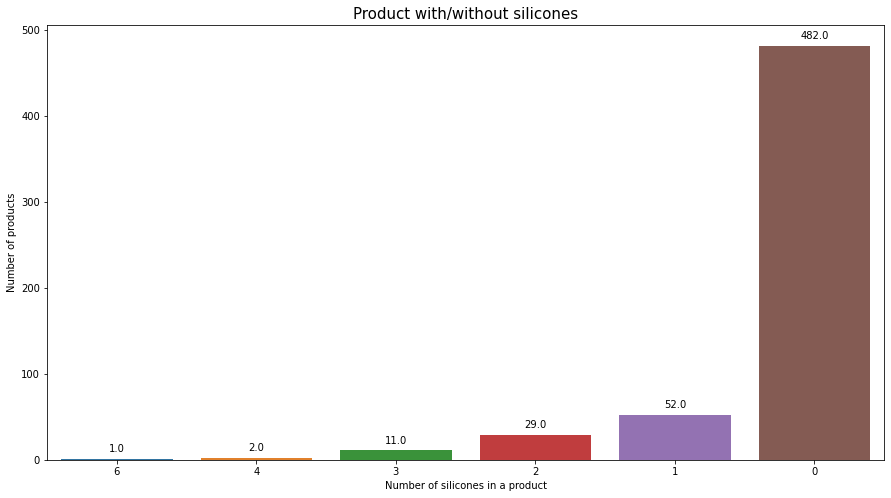

In [50]:
make_bar_plot(cg_filter, cg_filter.values, cg_filter, 'Product with/without silicones','Number of silicones in a product','Number of products',cg_filter_sorted.index)

Get percentage values of products with different number of silicones in it.

<AxesSubplot:ylabel='Percentage of product with silicones'>

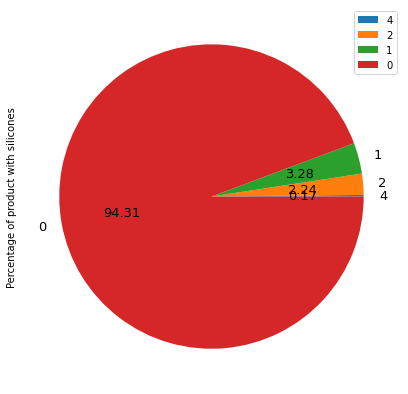

In [66]:
def percentage_values(series):
    percentage_values = []
    for value in series.values:
        percentage_values.append((value/series.values.sum())*100)
    return percentage_values


#CG or not CG with labeled class +plot
cg_prod_percentage = percentage_values(cg_filter_sorted)
cg_prod_percentage_df = pd.DataFrame(
    {'Number of silicones': cg_filter_sorted,
     'Percentage of product with silicones': cg_prod_percentage 
    })
cg_prod_percentage_df.plot.pie(y='Percentage of product with silicones', autopct='%.2f', fontsize=13, figsize=(7, 7))

In [67]:
# Get number of product with harmful preservatives
def get_harmful_by_peh(data, peh_type):
    peh_filt = (data['peh_class'] == peh_type)
    harm_by_peh = data.loc[peh_filt, 'Harm_preservatives'].value_counts()
    harm_by_peh = harm_by_peh.sort_index(ascending=True)
#     df_harm_by_peh = pd.DataFrame(harm_by_peh)
#     df_harm_by_peh_final = df_harm_by_peh.rename(columns={"Harm_preservatives": peh_type}).sort_index()
    return(harm_by_peh)

In [80]:
peh_list = peh_filter.values
peh_list_names = peh_filter.index

#populate harmful preservatives list
def harmful_pres_vs_peh_class(peh_list, peh_list_names):
    harm_by_peh_all = []
    harm_by_peh_all_names = []

    for peh_type in peh_list_names:
        harm_list = get_harmful_by_peh(df_peh_work, peh_type)
        harm_by_peh_all += harm_list.values.tolist()
        harm_by_peh_all_names += harm_list.index.tolist()
    return harm_by_peh_all, harm_by_peh_all_names

harmful_pres_vs_peh_class(peh_list, peh_list_names)

([190, 65, 15, 1, 1, 122, 47, 15, 67, 55, 2],
 [0, 1, 2, 3, 4, 0, 1, 2, 0, 1, 2])

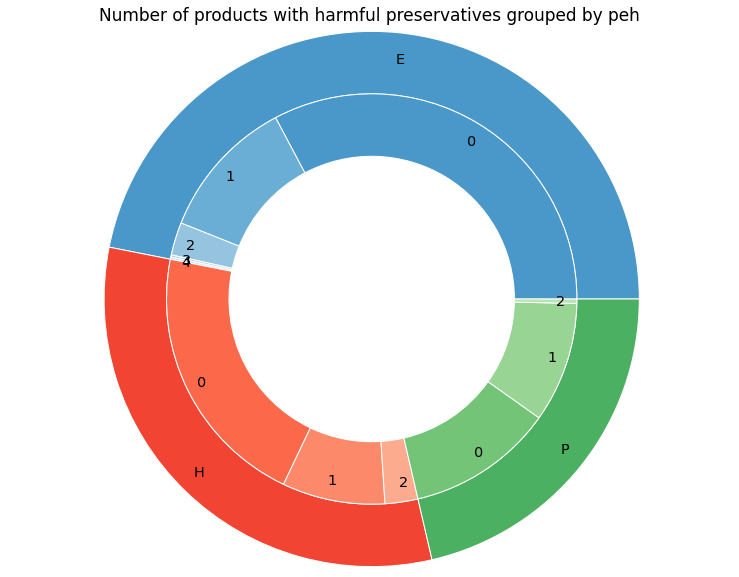

In [83]:
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
textprops={'size': 'x-large'}
# First Ring (outside)
fig, ax = plt.subplots(figsize=(13,10))
mypie, _ = ax.pie(peh_list, radius=3, labels=peh_list_names, colors=[a(0.6), b(0.6), c(0.6)], labeldistance=0.9, textprops=textprops)
plt.setp( mypie, width=0.7, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(harm_by_peh_all, radius=3-0.7, labels=harm_by_peh_names, labeldistance=0.9, colors=[a(0.6), a(0.5), a(0.4), a(0.3), a(0.2), b(0.5), b(0.4), b(0.3), c(0.5), c(0.4), c(0.3)], textprops=textprops)
plt.setp( mypie2, width=0.7, edgecolor='white')
plt.margins(0,0)
ax.set_title("Number of products with harmful preservatives grouped by peh", fontsize=17)
ax.axis('equal')

# first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
# second_ledgend = plt.legend(patches2, pop_labels, loc="best",fontsize=13)

# show it
plt.show()

In [1]:
#Mean number of ingredients for each product +plot
# df_peh_work['Mean number of ingredients'] = .apply(lambda x: int(x.split('-')[0]))

# df_peh_work['Mean number of ingredients'] = [len(df_peh_work['inci_as_array'][x]) for x in df_peh_work['inci_as_array']]
# df_peh_work.head()

In [ ]:
#Products with protein , with natural oils/butters: + rodzaje + wykresy

# Prepare dataset for training

In [67]:
df_final = df_peh_work.drop(df_peh_work.columns[[0, 1, 3, 4, 5]], axis=1)
# df_final.head()

In [68]:
df_shuffled=df_final.sample(frac=1).reset_index(drop=True)
# df_shuffled.head()

In [69]:
#Check if the data were shuffled
df_shuffled.loc[70:75, 'peh_class']

70    H
71    H
72    E
73    P
74    H
75    E
Name: peh_class, dtype: object

## Save cleaned dataset to csv file for the future projects

In [90]:
path_to_output = r'C:\Users\Pszczółka\Projects\Data_Science_Projects\Clustering_PEH_dataset'
df_shuffled.to_csv(path_to_output + r'\PEH_dataset_clustering.csv')

## Split dataset into training and testing part

In [62]:
X = df_shuffled.iloc[:,1:]
y = df_shuffled.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
X_train.shape

(388, 1627)

In [64]:
X_test.shape

(192, 1627)

# Compare different ML models for multiclassification

# KNeighbours Classifier

In [65]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5833333333333334


## Decision tree classifier

In [67]:
dtree_model = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))

Accuracy: 0.5833333333333334


## Support vector classifier

In [79]:
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, svm_predictions), "\nDecision function shape: ", svm_model_linear.decision_function_shape)

Accuracy: 0.6875 
Decision function shape:  ovr


In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           E       0.71      0.79      0.75        92
           H       0.69      0.58      0.63        59
           P       0.62      0.61      0.62        41

    accuracy                           0.69       192
   macro avg       0.68      0.66      0.67       192
weighted avg       0.69      0.69      0.68       192



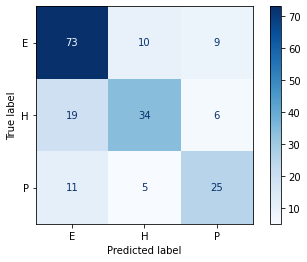

In [81]:
plot_confusion_matrix(svm_model_linear,
                                    X_test, y_test,
                                    cmap=plt.cm.Blues)

# Hyperparameter tuning for SVC

In [89]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

SVC(C=1000, gamma=0.001)


In [88]:
svc_tunned_predict = grid.predict(X_test)
print(classification_report(y_test,svc_tunned_predict))

              precision    recall  f1-score   support

           E       0.70      0.78      0.74        92
           H       0.67      0.56      0.61        59
           P       0.62      0.61      0.62        41

    accuracy                           0.68       192
   macro avg       0.67      0.65      0.66       192
weighted avg       0.68      0.68      0.67       192



In [72]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 

print("Accuracy from metrics:",metrics.accuracy_score(y_test, gnb_predictions))

Accuracy from metrics: 0.5677083333333334


In [73]:
from sklearn.ensemble import RandomForestClassifier
random_for = RandomForestClassifier()
random_for.fit(X_train, y_train)
rf_predictions = random_for.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, rf_predictions))

Accuracy:  0.6875


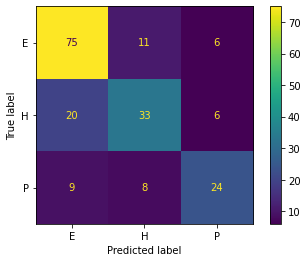

In [82]:
plot_confusion_matrix(random_for,
                            X_test, y_test,
                            cmap=plt.cm.viridis)

In [ ]:
# Analysis the confusion matrix
#Add statistical analysis

In [75]:
snn_classifier = MLPClassifier(max_iter=300)
snn_classifier.fit(X_train, y_train)
snn_predictions = snn_classifier.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, snn_predictions))

Accuracy:  0.6875


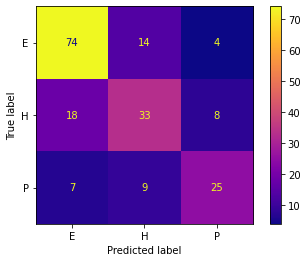

In [83]:
plot_confusion_matrix(snn_classifier,
                                X_test, y_test,
                                cmap=plt.cm.plasma)

I've built several multiclass classifiers : KNeighboursClassifier, Decision Tree Classifier, SVC with a linear kernel, Gaussian Naive Bayes Classifier, Random Forest Classifier and one neural network (MLP classifier). Some of them achieve almost 70% accuracy which is a good score for a fist shot.

Models have to be further tested.

In [ ]:
#Try xgboost and grid search for random forest ! 